In [1]:
import sys
sys.path.insert(0, '../')

import src.utils as util
%load_ext autoreload
%autoreload 2

import pandas as pd

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from solartime import SolarTime
from datetime import date

from pytz import timezone

In [2]:
import src.utils as util

We are removing the data before sunrise and after sunset

In [2]:
data = pd.read_pickle('../input/timeseries')

In [4]:
temp_df = data.reset_index()
solar_times = []
lat, lon = -37.8136, 144.9631
localtz = timezone('Australia/Melbourne')
sun = SolarTime()

In [5]:
for val in temp_df['date_str']:
    schedule = sun.sun_utc(val, lat, lon)
    sunset = schedule['sunset'].astimezone(localtz)
    sunrise = schedule['sunrise'].astimezone(localtz)
    sunset = pd.Timestamp(sunset).tz_localize(None)
    sunrise = pd.Timestamp(sunrise).tz_localize(None)
    if val >= sunrise and val <= sunset+pd.DateOffset(hours=2):
        solar_times.append(True)
    else:
        solar_times.append(False)

In [6]:
temp_df['solar_time'] = solar_times
temp_df.head()

,date_str,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6010,6014,...,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269,solar_time
0,2020-02-13 00:00:00,16.88,12.34,4.54,6.93,5.41,4.54,0.00,6.88,0.05,...,0.0,0.0,0.0,1.26,0.00,1.41,0.05,0.0,0.0,False
1,2020-02-13 00:05:00,17.71,12.34,5.37,7.09,5.25,5.37,0.00,6.96,0.13,...,0.0,0.0,0.0,1.09,0.00,1.29,0.13,0.0,0.0,False
2,2020-02-13 00:10:00,13.78,12.39,1.39,7.24,5.15,1.39,0.00,7.02,0.22,...,0.0,0.0,0.0,1.02,0.00,1.26,0.22,0.0,0.0,False
3,2020-02-13 00:15:00,15.60,11.38,4.22,5.76,5.62,4.22,0.00,5.68,0.08,...,0.0,0.0,0.0,1.06,0.00,1.33,0.08,0.0,0.0,False
4,2020-02-13 00:20:00,16.04,11.33,4.71,5.45,5.88,4.44,0.27,5.39,0.06,...,0.0,0.0,0.0,1.27,0.27,1.37,0.06,0.0,0.0,False


In [7]:
solar_df = temp_df.loc[temp_df['solar_time'] == True].set_index('date_str')
solar_df = solar_df.drop(columns = ['solar_time'])

In [8]:
solar_df_temp = solar_df[['grid']].rename(columns ={'grid':'solar_time'})
plot_data = pd.concat([solar_df_temp, data[['grid']]], axis=1)

In [16]:
fig = go.Figure()
data_size_to_plot = 5000
# fig.add_trace(go.Scatter(x=plot_data.index[:data_size_to_plot], y = plot_data['solar_time'][:data_size_to_plot], 
#                          name = 'solar time data'))

In [12]:
solar_df.to_csv('../input/solar_timeseries.csv')
solar_df.to_pickle('../input/solar_timeseries')

In [13]:
# train, val, test split
n = len(solar_df)
train_df = solar_df[0:int(n * 0.7)]
val_df = solar_df[:int(n * 0.9)]
test_df = solar_df

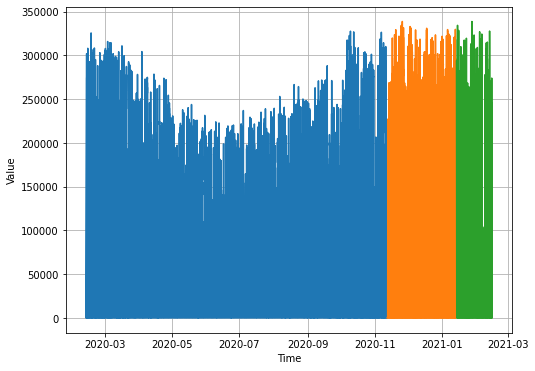

In [15]:
util.plot_multiple_series([train_df.index, val_df[int(n * 0.7):].index, test_df[int(n * 0.9):].index],
                          [train_df['grid'].values, val_df[int(n * 0.7):]['grid'].values,
                          test_df[int(n * 0.9):]['grid'].values])

Plot the new time series

In [4]:
solar_ts= pd.read_pickle('../input/solar_timeseries')

In [6]:
data = pd.read_pickle('../input/timeseries')

In [7]:
plot_solar = solar_ts[['grid']].rename(columns ={'grid':'solar_time'})
plot_data = pd.concat([plot_solar, data[['grid']]], axis=1)

In [8]:
fig = go.Figure()
data_size_to_plot = 5000
fig.add_trace(go.Scatter(x=plot_data.index[:data_size_to_plot], y = plot_data['solar_time'][:data_size_to_plot], 
                         name = 'solar time data'))